In [223]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [224]:
DATA = []
nlp = pd.read_csv('Main.csv',sep='|')
DATA.append(pd.read_csv('TCS.csv'))
DATA.append(pd.read_csv('TATASTL.csv'))
DATA.append(pd.read_csv('BAJAJ.csv'))
x = []
for i in DATA[0]['Date']:
    x.append(i)
new_x = dates.datestr2num(x)


## Moving Average
This function is used for generate a sma for a period of a 

In [225]:
def mav(y,a):
    mov_avg = 0.0
    avg = []
    for i in range(a-1):
        mov_avg+=y[i]
        avg.append(0)
    for i in range(a-1,len(y)):
        if i == (a-1):
            mov_avg += y[i]
        else:
            mov_avg += (y[i] - y[i-a])
        avg.append(mov_avg/float(a))
        #print(mov_avg/float(a))
    return avg



## Exponential Moving Average 
this function  generates the ema for a period of 'a' with the multiplier 'b'

In [226]:
def emav(y,a,b):
    mov_avg = 0.0
    mult = b/(a + 1)
    avg = []
    for i in range(a-1):
        mov_avg+=y[i]
        avg.append(0)
    for i in range(a-1,len(y)):
        if i == (a-1):
            mov_avg += y[i]
            mov_avg = mov_avg*mult
        else:
            mov_avg = (y[i] - avg[i-1])*mult + avg[i-1] 
        avg.append(mov_avg)
        #print(mov_avg/float(a))
    return avg


## Weighted Moving Average
this function generates the weighted moving avergae with a periord of 'a' and with weights 'b'

In [227]:

def wmav(y,a,b):
    avg = []
    for i in range(a-1):
        avg.append(0)
    for i in range(a-1,len(y)):
        mov_avg = 0.0
        for j in range(a):
            mov_avg += y[i-j]*b[j]
        avg.append(mov_avg/float(a))
        #print(mov_avg/float(a))
    return avg 


## Double Crossover Trading Algorithm
this function trades on a stock based on the crossover of the longterm and shortterm moving averages

In [228]:
def doubleCrossNLP(a,b,y,SYMB):
    nl = nlp.loc[nlp['SYM']==SYMB]
    prid = []
    prid_date = []
    for i in nl['date']:
        prid_date.append(i)
    prd_date = dates.datestr2num(prid_date)
    for i in nl['Difference']:
        prid.append(i)
    pr_ct = [0]*(len(new_x))
    for i in range(len(new_x)):
        for j in range(len(prd_date)):
            if prd_date[j] == new_x[i]:
                pr_ct[i] = prid[j]
    y1 = mav(y,a)
    y2 = mav(y,b)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y1[i] > y2[i] and (asset-y[i]) >=0:
            stk_buy = 1
            if pr_ct[i] < 0:
                rv = int(pr_ct[i]*(-2))
                stk_buy = min(int(asset/y[i]),rv)
            stock+=stk_buy
            asset-=y[i]*stk_buy
        elif y1[i] < y2[i] and stock >0:
            stk_buy = 1
            if pr_ct[i] > 0:
                rv = int(pr_ct[i]*(2))
                stk_buy = min(stock,rv)
            stock-=stk_buy
            asset+=y[i]*stk_buy
        eval[i] = (stock*y[i] + asset)
    profit = (stock*y[len(y)-1] + asset)
    return eval,profit


In [229]:
def doubleCross(a,b,y):
    y1 = mav(y,a)
    y2 = mav(y,b)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y1[i] > y2[i] and (asset-y[i]) >=0:
            stk_buy = 1
            stock+=stk_buy
            asset-=y[i]*stk_buy
        elif y1[i] < y2[i] and stock >0:
            stk_buy = 1
            stock-=stk_buy
            asset+=y[i]*stk_buy
        eval[i] = (stock*y[i] + asset)
    profit = (stock*y[len(y)-1] + asset)
    return eval,profit

## Tripple CrossOver Trading Algorithm
this function trades on a stock based on the crossover of the longterm, shortterm and medium term moving averages

In [230]:

def trippleCross(a,b,c,y,):
    y1 = mav(y,a)
    y2 = mav(y,b)
    y3 = mav(y,c)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y1[i] < y3[i] and y3[i] > y2[i] and y2[i] > y1[i] and stock >0:
            stock-=1
            asset+=y[i]
        elif y1[i] > y2[i] and y1[i] > y3[i] and y2[i] > y3[i] and  (asset-y[i]) >=0:
            stock+=1
            asset-=y[i]
        cur_profit = (stock*y[i] + asset)
        eval[i] = cur_profit
    profit = stock*y[len(y)-1] + asset
    return eval,profit


## Tripple CrossOver based on Exponential Moving Averades
this function trades on a stock based on the crossover of shortterm and mediumterm EMA and a longterm SMA

In [231]:

def expoTrippleCross(a1,a2,b1,b2,c,y):
    y1 = emav(y,a1,a2)
    y2 = emav(y,b1,b2)
    y3 = mav(y,c)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y1[i] < y3[i] and y3[i] > y2[i] and y2[i] > y1[i] and stock >0 :
            stock-=1
            asset+=y[i]
        elif y1[i] > y2[i] and y1[i] > y3[i] and y2[i] > y3[i] and (asset-y[i]) >=0:
            stock+=1
            asset-=y[i]
        eval[i] = (stock*y[i] + asset)
    profit = stock*y[len(y)-1] + asset
    return eval,profit


## Moving Average Convergence Divergence (MACD)
This function uses the EMA for short and medium term ma ,and also calculates the MACD and the signal line ,
It uses the crossover between MACD and the signal

In [232]:

def MACD(a1,a2,b1,b2,c1,c2,y):
    y1 = emav(y,a1,a2)
    y2 = emav(y,b1,b2)
    y3 = [0]*len(y1)
    for i in range(len(y1)):
        y3[i] = y1[i] - y2[i]
    y4 = emav(y3,c1,c2)
    histo = [0]*len(y2)
    for i in range(len(y3)):
        histo[i] = y3[i] - y4[i]
    
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y3[i] > y4[i] and (asset-y[i]) >=0 :
            stock+=1
            asset-=y[i]
        elif y3[i] < y4[i] and stock >0:
            stock-=1
            asset+=y[i]
        eval[i] = (stock*y[i] + asset)
        
    profit = stock*y[len(y)-1] + asset
    return eval,y3,y4,histo,profit


## Moving Average Convergence Divergence with MACD sign Crossover
This function uses the EMA for short and medium term ma ,and also calculates the MACD and the signal line ,
It uses the change of sign in MACD to trade .

In [233]:

def MACD_NG(a1,a2,b1,b2,c1,c2,y):
    y1 = emav(y,a1,a2)
    y2 = emav(y,b1,b2)
    y3 = [0]*len(y1)
    for i in range(len(y1)):
        y3[i] = y1[i] - y2[i]
    y4 = emav(y3,c1,c2)
    histo = [0]*len(y2)
    for i in range(len(y3)):
        histo[i] = y3[i] - y4[i]
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(51,len(y)):
        if y3[i] > 0 and y3[i-1] < 0 and (asset-y[i]) >=0 :
            stock+=1
            asset-=y[i]
        elif y3[i] < 0 and y3[i] > 0 and stock >0:
            stock-=1
            asset+=y[i]
        eval[i] = (stock*y[i] + asset)
        
    profit = stock*y[len(y)-1] + asset
    return eval,profit

## Ploting the Stock Prices , The MAs and Profits Corresponding to various Profits
## TCS

c:\users\anasc\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1220415.0999999992 1162657.2499999995 1196272.3999999997 1065932.0999999996 1025917.6499999998 1244917.65


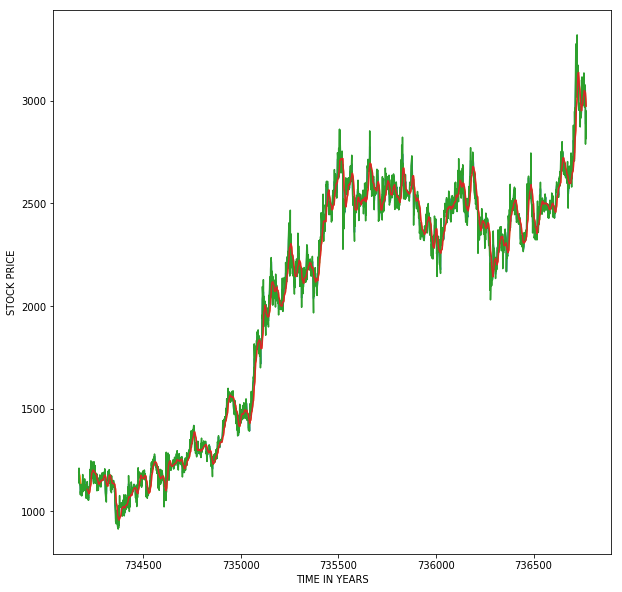

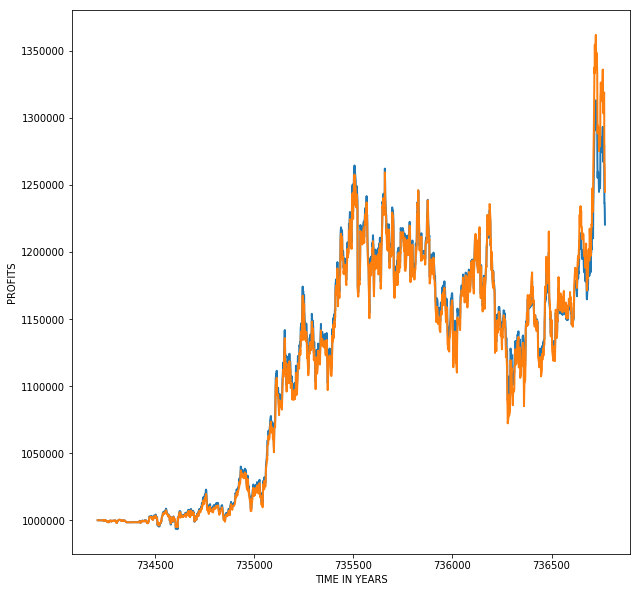

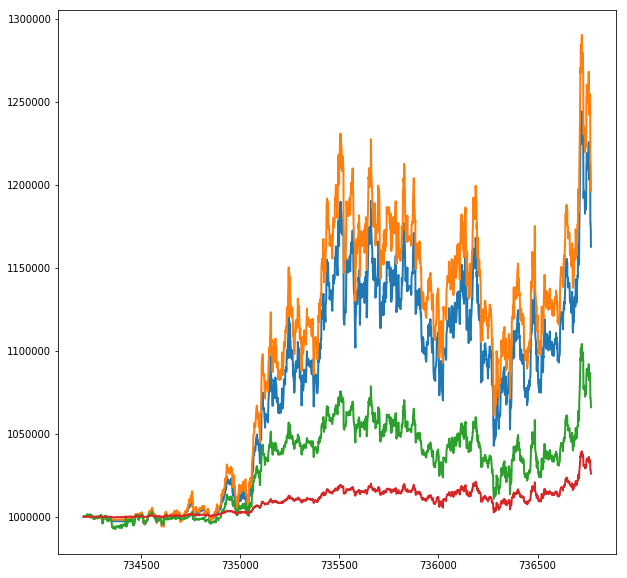

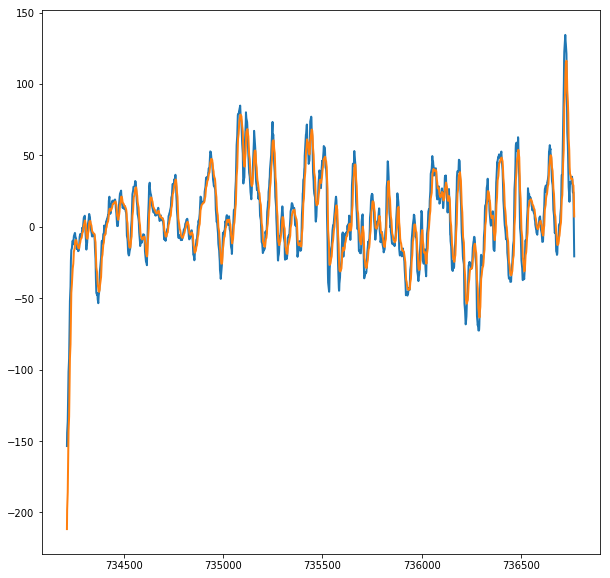

In [234]:
i = 1
x = []
y = []
for i in DATA[0]['Date']:
    x.append(i)
for i in DATA[0]['Close Price']:
    y.append(i)
new_x = dates.datestr2num(x)
plt.figure(i,(10, 10))
new_y = mav(y,10)
emv = emav(y,2,5)
wav = wmav(y,5,[1,1,1,1,1])
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('STOCK PRICE')
plt.subplot(111)
plt.plot(new_x[20:],y[20:])
plt.subplot(111)
plt.plot(new_x[20:],new_y[20:])
plt.subplot(111)
plt.plot(new_x[20:],emv[20:])
plt.subplot(111)
plt.plot(new_x[51:],new_y[51:])
i+=1
y1 = mav(y,5)
y2 = mav(y,15)
tp,profit = doubleCross(15,40,y)
tp1,profit1 = trippleCross(15,20,40,y)
tp2,profit2 = expoTrippleCross(10,3,20,4,35,y)
tp3,macdl,signal,histo,profit3 = MACD(12,2,26,2,9,2,y)
tp4,profit4 = MACD_NG(12,2,26,2,9,2,y)
tp5,profit5 = doubleCrossNLP(15,40,y,'MERGETCS')
print(profit,profit1,profit2,profit3,profit4,profit5)
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.subplot(111)
plt.plot(new_x[51:],tp[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp5[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],tp1[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp2[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp3[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp4[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],macdl[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],signal[51:], linewidth=2.0)
plt.subplot(111)

## Ploting the Stock Prices , The MAs and Profits Corresponding to various Profits
## TATA STEEL

c:\users\anasc\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1000933.6999999995 1006489.7999999992 1007132.6999999988 1001539.1999999994 1005553.4000000001


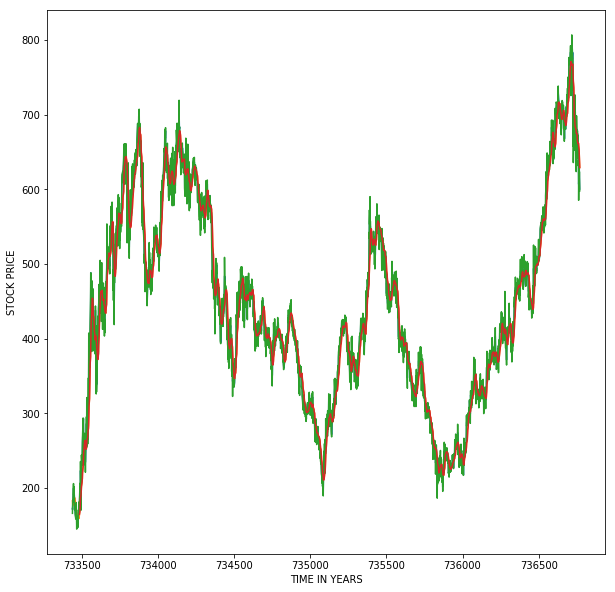

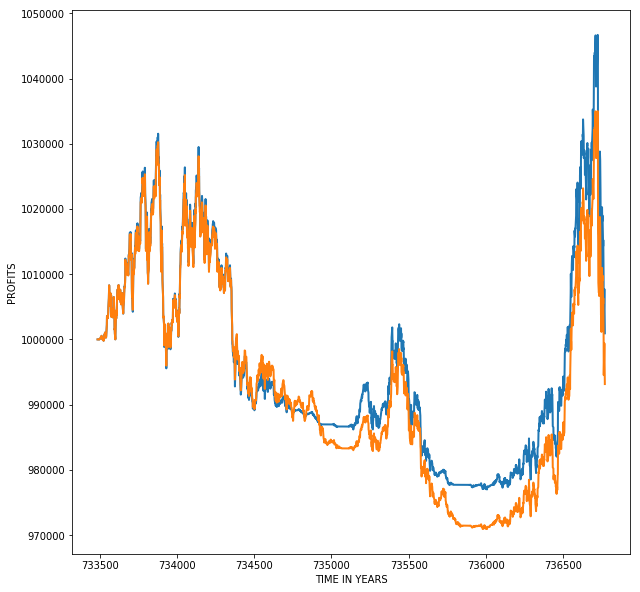

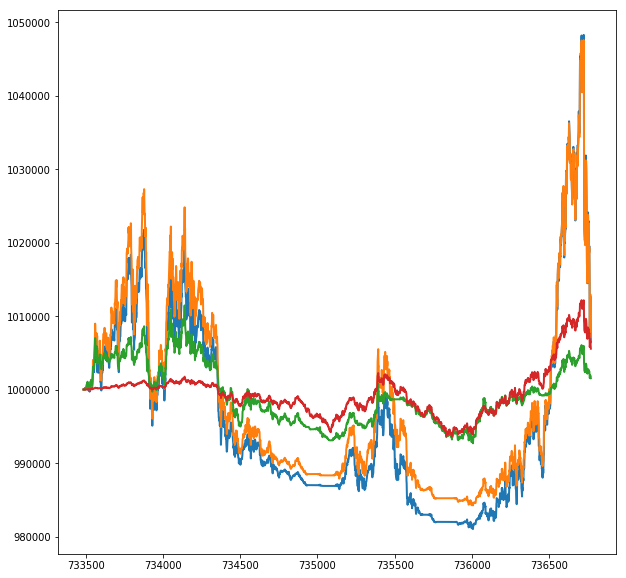

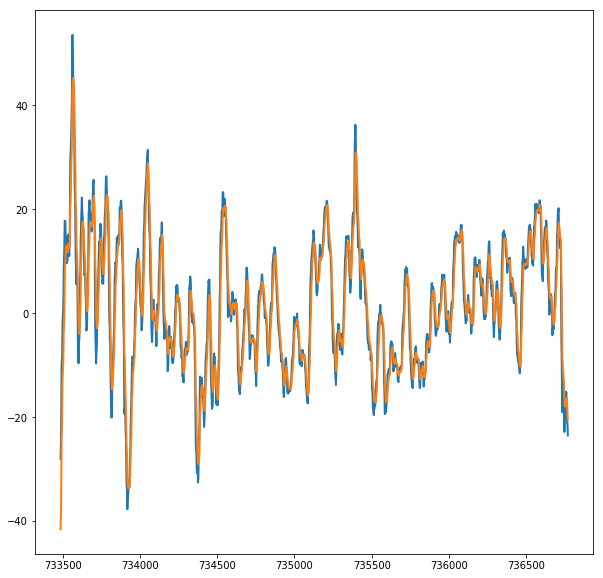

In [235]:
i = 1
x = []
y = []
for i in DATA[1]['Date']:
    x.append(i)
for i in DATA[1]['Close Price']:
    y.append(i)
new_x = dates.datestr2num(x)
plt.figure(i,(10, 10))
new_y = mav(y,10)
emv = emav(y,2,5)
wav = wmav(y,5,[1,1,1,1,1])
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('STOCK PRICE')
plt.subplot(111)
plt.plot(new_x[20:],y[20:])
plt.subplot(111)
plt.plot(new_x[20:],new_y[20:])
plt.subplot(111)
plt.plot(new_x[20:],emv[20:])
plt.subplot(111)
plt.plot(new_x[51:],new_y[51:])
i+=1
y1 = mav(y,5)
y2 = mav(y,15)
tp,profit = doubleCross(15,40,y)
tp1,profit1 = trippleCross(15,20,40,y)
tp2,profit2 = expoTrippleCross(10,3,20,4,35,y)
tp3,macdl,signal,histo,profit3 = MACD(12,2,26,2,9,2,y)
tp4,profit4 = MACD_NG(12,2,26,2,9,2,y)
tp5,profit5 = doubleCrossNLP(15,40,y,'MERGETATASTEEL')
print(profit,profit1,profit2,profit3,profit4)
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.subplot(111)
plt.plot(new_x[51:],tp[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp5[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],tp1[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp2[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp3[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp4[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],macdl[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],signal[51:], linewidth=2.0)
plt.subplot(111)

## Ploting the Stock Prices , The MAs and Profits Corresponding to various Profits
## BAJAJ

c:\users\anasc\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1072851.8500000017 1062477.7000000016 1074283.0500000017 1061445.5000000016 1022687.9999999999 1080987.0500000017


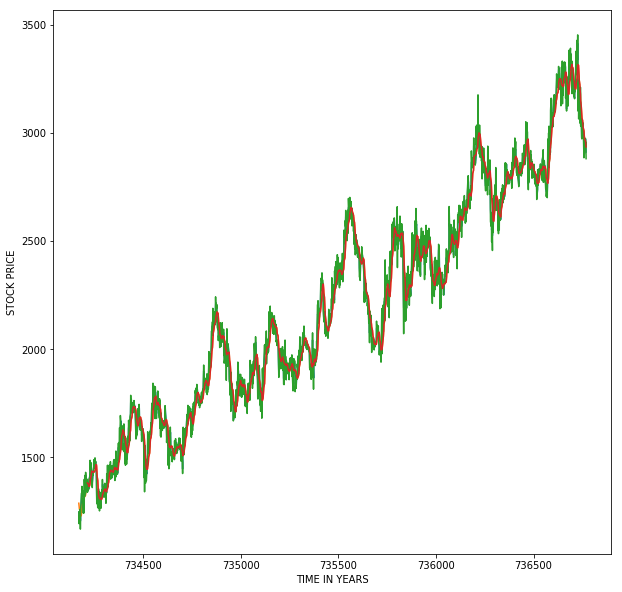

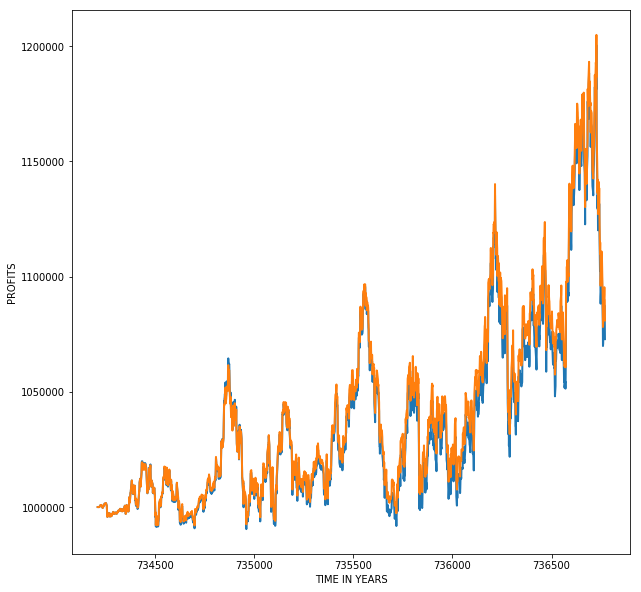

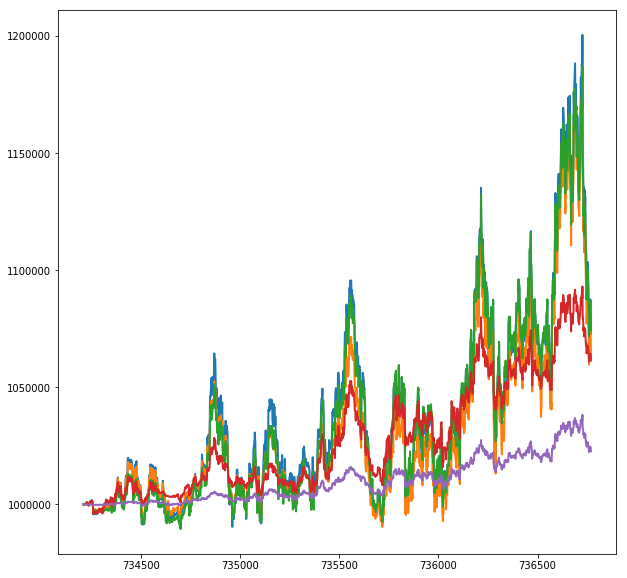

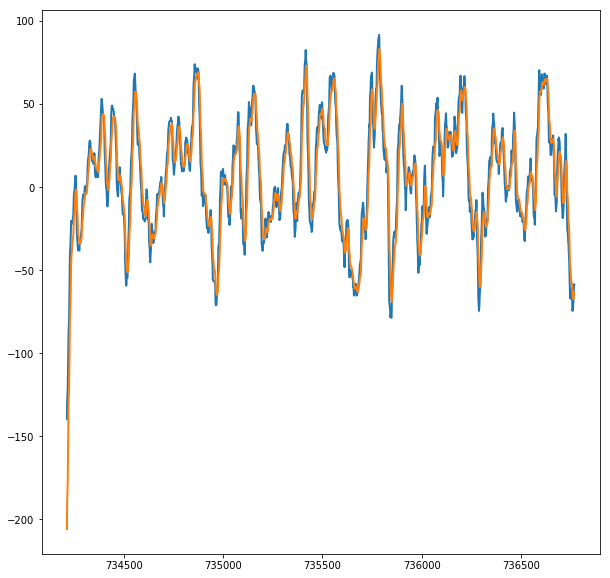

In [236]:
i = 1
x = []
y = []
for i in DATA[2]['Date']:
    x.append(i)
for i in DATA[2]['Close Price']:
    y.append(i)
new_x = dates.datestr2num(x)
plt.figure(i,(10, 10))
new_y = mav(y,10)
emv = emav(y,2,5)
wav = wmav(y,5,[1,1,1,1,1])
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('STOCK PRICE')
plt.subplot(111)
plt.plot(new_x[20:],y[20:])
plt.subplot(111)
plt.plot(new_x[20:],new_y[20:])
plt.subplot(111)
plt.plot(new_x[20:],emv[20:])
plt.subplot(111)
plt.plot(new_x[51:],new_y[51:])
i+=1
y1 = mav(y,5)
y2 = mav(y,15)
tp,profit = doubleCross(15,40,y)
tp1,profit1 = trippleCross(15,20,40,y)
tp2,profit2 = expoTrippleCross(10,3,20,4,35,y)
tp3,macdl,signal,histo,profit3 = MACD(12,2,26,2,9,2,y)
tp4,profit4 = MACD_NG(12,2,26,2,9,2,y)
tp5,profit5 = doubleCrossNLP(15,40,y,'MERGEBAJAJ')
print(profit,profit1,profit2,profit3,profit4,profit5)
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.figure(i,(10, 10))
plt.subplot(111).set_xlabel('TIME IN YEARS')
plt.subplot(111).set_ylabel('PROFITS')
plt.subplot(111)
plt.plot(new_x[51:],tp[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp5[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],tp[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp1[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp2[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp3[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],tp4[51:], linewidth=2.0)
i+=1
plt.figure(i,(10, 10))
plt.subplot(111)
plt.plot(new_x[51:],macdl[51:], linewidth=2.0)
plt.subplot(111)
plt.plot(new_x[51:],signal[51:], linewidth=2.0)
plt.subplot(111)